In [1]:
import tensorflow as tf
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from keras.datasets import mnist
from emnist import extract_training_samples,extract_test_samples

In [2]:
train_images, train_labels = extract_training_samples('letters')
test_images, test_labels = extract_test_samples('letters')

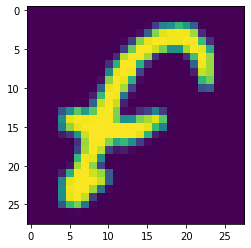

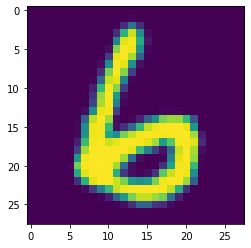

In [3]:
plt.imshow(train_images[999])
plt.show()
plt.imshow(test_images[999])
plt.show()

In [4]:
train_images = train_images / 255.0
test_images = test_images /255.0

In [5]:
# number of images
print(train_images.shape[0])
print(test_images.shape[0])

124800
20800


In [6]:
train_images = train_images.reshape(train_images.shape[0], 28, 28, 1)
test_images = test_images.reshape(test_images.shape[0], 28, 28, 1)
input_shape = (28, 28, 1)

In [7]:
model = tf.keras.Sequential([
    tf.keras.layers.Conv2D(10,6,activation='relu',input_shape=input_shape),
    tf.keras.layers.MaxPool2D(pool_size=(3,3),strides=(1,1)),
    tf.keras.layers.Conv2D(5,3,activation='relu'),
    tf.keras.layers.MaxPool2D(pool_size=(2,2),strides=(1,1)),
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(128,activation='relu'),
    tf.keras.layers.Dense(27,activation='softmax')
])
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 23, 23, 10)        370       
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 21, 21, 10)        0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 19, 19, 5)         455       
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 18, 18, 5)         0         
_________________________________________________________________
flatten (Flatten)            (None, 1620)              0         
_________________________________________________________________
dense (Dense)                (None, 128)               207488    
_________________________________________________________________
dense_1 (Dense)              (None, 27)                3

In [8]:
model.compile(optimizer='adam',loss='sparse_categorical_crossentropy',metrics=['accuracy'])
history = model.fit(train_images,train_labels,batch_size=32,epochs=2)

Epoch 1/2
3900/3900 [==============================] - 114s 29ms/step - loss: 0.5028 - accuracy: 0.8428
Epoch 2/2
3900/3900 [==============================] - 112s 29ms/step - loss: 0.2938 - accuracy: 0.9040


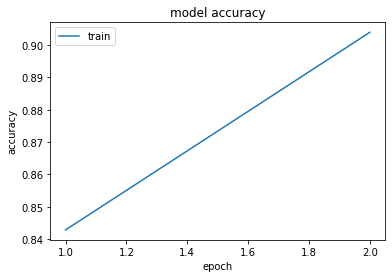

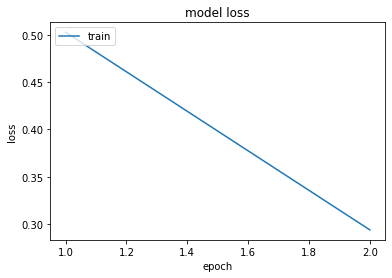

In [9]:
# summarize history for accuracy
plt.plot([1,len(history.epoch)],history.history['accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train'], loc='upper left')
plt.show()

# summarize history for loss
plt.plot([1,len(history.epoch)],history.history['loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train'], loc='upper left')
plt.show()

In [10]:
result = model.evaluate(test_images, test_labels)
print("accuracy on test data:",result[1])

650/650 [==============================] - 7s 10ms/step - loss: 0.2770 - accuracy: 0.9111
accuracy on test data: 0.911105751991272


In [11]:
predictions = model.predict(test_images)


some predictions by model :



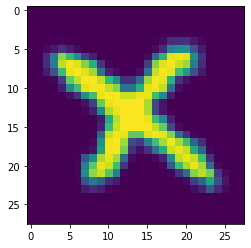

actual letter :  X
model's prediction :  X


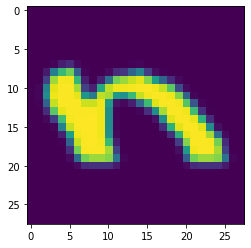

actual letter :  N
model's prediction :  N


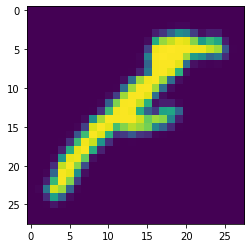

actual letter :  F
model's prediction :  F


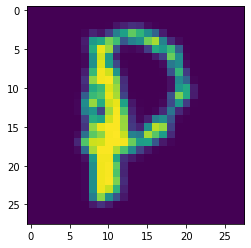

actual letter :  P
model's prediction :  P


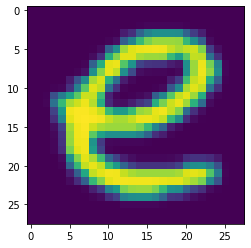

actual letter :  E
model's prediction :  E


In [16]:
print("\nsome predictions by model :\n")
for i in range(5):
    index = np.random.randint(0,len(test_images))
    plt.imshow(test_images[index])
    plt.show()
    ascii = np.argmax(predictions[index]) + 64
    print("actual letter : ",chr(test_labels[index]+64))
    print("model's prediction : ",chr(ascii))